## TP1: Basic Image Processing

**Group: Ambroise LAROYE-- LANGOUËT | Jack DU**
**SIA**

One of the most commonly used steps in many computer vision tasks is feature extraction.
In this lesson, you will study two algorithms for extracting low-level features, i.e., corners and
edges.
For grading, each group needs to submit the following documents to xuan-son.nguyen@ensea.fr :
1. A report (in english) with the problem formulation, pseudocodes of algorithms, experimental evaluations and a detailed analysis of obtained results.
2. Codes with comments. Details of important parts of the codes can be given in the report.

# 1 Harris Corner Detector

The Harris corner detector is used to locate corners in an image. Intuitively, if one moves a
window over an image patch, and a corner is present, then a strong intensity change can be
observed regardless of the moving direction.

**Notations.** Denote by I the input image, Ix and Iy the partial derivatives of I, Ix^2, Iy^2, and Ix.Iy
the second-order moments of partial intensity derivatives, ¯Ix^2,¯Iy^2, and ¯(Ix.Iy) the smooth versions of Ix^2, Iy^2, and Ix.Iy, respectively.


**Algorithm.** <br>

**Step 1 :** Compute approximations of Ix and Iy. Two common methods can be used. The frst method consists in employing a two-dimensional Gaussian filter Gσd
and convolving its closed-form partial derivatives with I. The second method applies the horizontal and
vertical Sobel masks to I.

**Step 2 :** Compute Ix^2, Iy^2, and Ix.Iy.

**Step 3 :** Compute smooth versions of Ix^2, Iy^2, and Ix.Iy using another two-dimensional Gaussian filter Gσw , where σw > σd.

The auto-correlation matrix Ai,j at every pixel (i, j) is defined as


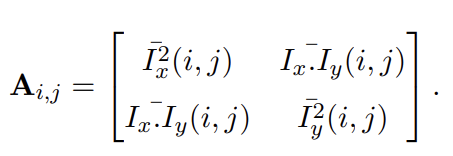

**Step 4 :** Compute the Harris response at pixel (i, j) as

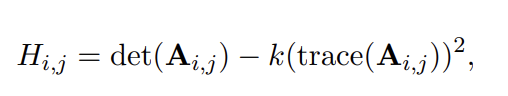

where k is a positive constant.


The Harris response Hi,j can be seen as a measure of "cornerness" and can be interpreted
as follows : negative values indicating edges, close-to-zero values indicating flat regions,
and large positive values indicating corners.

**Step 5 :** Apply non-maximum suppression to the Harris response H. A pixel (i, j) is
identified as a corner location if Hi,j ≥ θ and Hi,j = max(m,n)∈N (i,j){Hm,n}, where θ is
a positive threshold and N (i, j) is the set of neighboring pixels to (i, j), including pixel
(i, j).


## 1.1 Questions

- Is the Harris corner detector robust with respect to intensity shifts and intensity scalings ? <br>
The Harris corner detector is robust to intensity shift but not so robust to intensity scalings.

- Is the Harris corner detector robust with respect to translation ? <br>
The Harris corner detector is robust to translation.

- Is the Harris corner detector robust with respect to rotation ? <br>
The Harris corner detector is not robust to rotation.

For justification and in-detail explaination, check the report.

## 1.2 Practical Work
Implement a Harris corner detector for grayscale images. Test your implementation on the provided images CircleLineRect.png and zurlim.png. Visualize the following images :
- The computed Harris response H as a grayscale image.
- The detected corner pixels on I.


Test the robustness of the Harris corner detector with respect to different transformations mentioned in Section 1.1.

**Hint :** In order to compute image derivatives, you might need to import the following functions
at the beginning of your codes : <br>
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve <br>
The scipy library provides useful functions for geometric transformations of images : <br>
from scipy.ndimage.interpolation import rotate <br>
Results can be plotted using matplotlib : <br>
import matplotlib.pyplot as plt

In [ ]:
## Import the image

from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, convolve, maximum_filter
from skimage import io, color

# Load the grayscale images
I = io.imread('CircleLineRect.png', as_gray=True)
zurlim = io.imread('zurlim.png', as_gray=True)

# Parameters
sigma_d = 2  # Sigma for Gaussian derivative
sigma_w = 3  # Sigma for Gaussian smoothing

In [ ]:
# Input image

plt.figure(figsize=(12, 6))
plt.imshow(I, cmap='gray')
plt.title('Input image)')

In [ ]:
# Step 1: Compute Ix and Iy using the Gaussian filter's partial derivatives
# Gaussian filter 1D derivatives along x and y with Sobel
Ix = convolve(I, [[-1, 0, 1]])  # Convolution along x-direction
Iy = convolve(I, [[-1], [0], [1]])  # Convolution along y-direction

# Or alternatively using the gaussian_filter1d to compute gradients with Gaussian derivative:
# Ix = gaussian_filter1d(I, sigma=sigma_d, axis=0, order=1)
# Iy = gaussian_filter1d(I, sigma=sigma_d, axis=1, order=1)

# Display of gradient Ix et Iy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap='gray')
plt.title('Gradient along axis x (Ix)')

plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap='gray')
plt.title('Gradient along axis y (Iy)')

plt.show()

In [ ]:
## STEP 2: Compute Ix^2, Iy^2, and Ix.Iy.

Ixx = Ix ** 2
Iyy = Iy ** 2
Ixy = Ix * Iy

# Display 2nd order derivate
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(Ixx, cmap='gray')
plt.title('Ixx = Ix^2')

plt.subplot(1, 3, 2)
plt.imshow(Iyy, cmap='gray')
plt.title('Iyy = Iy^2')

plt.subplot(1, 3, 3)
plt.imshow(Ixy, cmap='gray')
plt.title('Ixy = Ix * Iy')

plt.show()

In [ ]:
## STEP 3: Compute smooth versions of Ix^2, Iy^2, and Ix.Iy using another two-dimensional Gaussian filter Gσw , where σw > σd.

Ixx = gaussian_filter1d(Ixx, sigma=sigma_w)
Iyy = gaussian_filter1d(Iyy, sigma=sigma_w)
Ixy = gaussian_filter1d(Ixy, sigma=sigma_w)

# Display 2nd order derivate after smoothing
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(Ixx, cmap='gray')
plt.title('Ixx smoothed')

plt.subplot(1, 3, 2)
plt.imshow(Iyy, cmap='gray')
plt.title('Iyy smoothed')

plt.subplot(1, 3, 3)
plt.imshow(Ixy, cmap='gray')
plt.title('Ixy smoothed')

plt.show()

In [ ]:
# STEP 4 : Calculate the Harris response H

k = 0.04  # Harris constant
detM = (Ixx * Iyy) - (Ixy ** 2)
traceM = Ixx + Iyy
H = detM - k * (traceM ** 2)

# Display of the Harris response H
plt.figure()
plt.imshow(H, cmap='gray')
plt.title('Harris response (H)')
plt.show()


In [ ]:
# STEP 5: Corner detection
# Ajust the threshold
threshold = 0.1 * H.max()

# kernel to detect local maximum
#kernel = np.ones((5,5))
# Apply convolve to get the local maximum
#local_max = convolve(H, kernel, mode='constant', cval=0.0)

H_max_filter = maximum_filter(H, size = 5)

# Identify the corner
# corner_peaks = (H > threshold) & (H == local_max)
corner_peaks = (H >= threshold)

# Extract the localisation of the corners
y, x = np.nonzero(corner_peaks)

# Print how many corners are detected
print(f"Numbers of detected corners: {len(x)}")
print(f"Localisation of the detected corners: {list(zip(x, y))}")

# Display the corners on the original image
plt.figure(figsize=(5, 5))
plt.imshow(I, cmap='gray')
plt.scatter(x, y, c='r', s=50)
plt.title('Detected corners on the original image')
plt.show()


In [ ]:
# STEP 5: Corner detection
# Ajust the threshold
threshold = 0.1 * H.max()

# kernel to detect local maximum
#kernel = np.ones((5,5))
# Apply convolve to get the local maximum
#local_max = convolve(H, kernel, mode='constant', cval=0.0)

H_max_filter = maximum_filter(H, size = 5)

# Identify the corner
# corner_peaks = (H > threshold) & (H == local_max)
corner_peaks = (H >= threshold) & (H == H_max_filter)

# Extract the localisation of the corners
y, x = np.nonzero(corner_peaks)

# Print how many corners are detected
print(f"Numbers of detected corners: {len(x)}")
print(f"Localisation of the detected corners: {list(zip(x, y))}")

# Display the corners on the original image
plt.figure(figsize=(5, 5))
plt.imshow(I, cmap='gray')
plt.scatter(x, y, c='r', s=50)
plt.title('Detected corners on the original image')
plt.show()


In [ ]:
plt.figure()
plt.imshow(H, cmap='hot')  # Use of 'hot' to get better contrast
plt.title("Harris response (H)")
plt.colorbar() # to show to colorbar gradient
plt.show()

print(f"Min value of H: {H.min()}")
print(f"Max value of H: {H.max()}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, maximum_filter

I = plt.imread('zurlim.png')

if I.ndim == 3:
    I = I[:, :, 0]

# Normalize the image to uint8 format if necessary
if I.max() <= 1:
    I = (I * 255).astype(np.uint8)
else:
    I = I.astype(np.uint8)

# Parameters for Harris corner detection
sigma_d = 2  # gradient
sigma_w = 3  # smoothing

# Function to compute Harris corners
def harris_corners(image):
    Ix = gaussian_filter1d(image, sigma=sigma_d, axis=0, order=1)
    Iy = gaussian_filter1d(image, sigma=sigma_d, axis=1, order=1)

    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy

    Ixx = gaussian_filter1d(Ixx, sigma=sigma_w)
    Iyy = gaussian_filter1d(Iyy, sigma=sigma_w)
    Ixy = gaussian_filter1d(Ixy, sigma=sigma_w)

    k = 0.04
    detM = (Ixx * Iyy) - (Ixy ** 2)
    traceM = Ixx + Iyy
    H = detM - k * (traceM ** 2)

    # Threshold and non-maximum suppression
    threshold = 1 * H.max()
    H_max_filter = maximum_filter(H, size=5)

    # Identify the corner
    corner_peaks = (H >= threshold) & (H == H_max_filter)

    # Return the coordinates of detected corners
    y, x = np.nonzero(corner_peaks)
    return x, y

# Detect corners in the original image
original_corners_x, original_corners_y = harris_corners(I)

# Apply intensity shift
shift_value = 10  # Shift the intensities by 10
I_shifted = np.clip(I.astype(np.int16) + shift_value, 0, 255).astype(np.uint8)

# Detect corners in the shifted image
shifted_corners_x, shifted_corners_y = harris_corners(I_shifted)

# Apply intensity scaling
scale_factor = 1.02
I_scaled = np.clip(I.astype(np.float32) * scale_factor, 0, 255).astype(np.uint8)

# corners
scaled_corners_x, scaled_corners_y = harris_corners(I_scaled)

plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.scatter(original_corners_x, original_corners_y, c='r', s=10)
plt.title('Original Image with Detected Corners')

# Shifted Image
plt.subplot(1, 3, 2)
plt.imshow(I_shifted, cmap='gray')
plt.scatter(shifted_corners_x, shifted_corners_y, c='r', s=10)
plt.title('Shifted Image with Detected Corners')

# Scaled Image
plt.subplot(1, 3, 3)
plt.imshow(I_scaled, cmap='gray')
plt.scatter(scaled_corners_x, scaled_corners_y, c='r', s=10)
plt.title('Scaled Image with Detected Corners')

plt.show()


## Translation

In [ ]:
from scipy.ndimage import gaussian_filter1d, maximum_filter, shift, rotate

translation_shift = (50, 20)  # Shift by (y, x)
I_translated = shift(I, shift=translation_shift)

# Detect "new" corners
translated_corners_x, translated_corners_y = harris_corners(I_translated)

plt.imshow(I_translated, cmap='gray')
plt.scatter(translated_corners_x, translated_corners_y, c='r', s=10)
plt.title(f'Translated Image (Shift {translation_shift})')

## Rotation

In [ ]:
rotation_angle = 15  # Rotate by 15 degrees
I_rotated = rotate(I, angle=rotation_angle, reshape=False)

rotated_corners_x, rotated_corners_y = harris_corners(I_rotated)

plt.imshow(I_rotated, cmap='gray')
plt.scatter(rotated_corners_x, rotated_corners_y, c='r', s=10)
plt.title(f'Rotated Image (Angle {rotation_angle} degrees)')

# 2.1 Questions : Edge detection
Consider a single row or column of a grayscale image. Figure 1 plots intensity as a function of position that gives a signal. Sketch the derivatives of the given functions and show the edge positions.


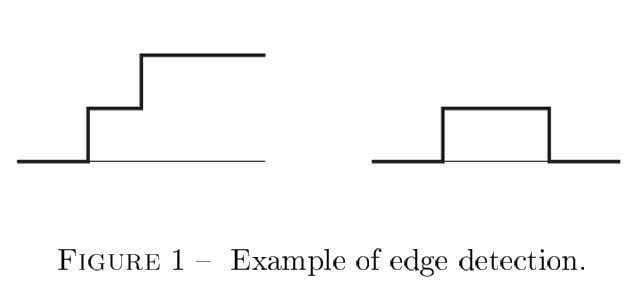

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
zurlim = io.imread('CircleLineRect.png', as_gray=True)
sigma_d = 1

# Extract a single row of the image
row = zurlim[100, :]

# First and second derivatives
first_derivate = gaussian_filter1d(row, sigma=sigma_d, axis=0, order=1)
second_derivate = gaussian_filter1d(first_derivate, sigma=sigma_d, axis=0, order=1)

plt.figure(figsize=(12, 6))

# Original intensity
plt.subplot(3, 1, 1)
plt.plot(row, color='black')
plt.title('Intensity Profile of a Single Row')
plt.xlabel('Position')
plt.ylabel('Intensity')

# First derivative
plt.subplot(3, 1, 2)
plt.plot(first_derivate, color='blue')
plt.title('First Derivative of Intensity')
plt.xlabel('Position')
plt.ylabel('First Derivative')

# Second derivative
plt.subplot(3, 1, 3)
plt.plot(second_derivate, color='red')
plt.title('Second Derivative of Intensity')
plt.xlabel('Position')
plt.ylabel('Second Derivative')

# Show the figure
plt.tight_layout()
plt.show()


# 2.2 Canny Edge Detection
The Canny filter finds edges by searching for local minima or maxima in the approximated
first-order derivative of an image.

**Notations.** The same notations are used as in Section 1.

### **Algorithm:**
#### **Step 1 :** Gaussian-smoothed image.
Smooth image I by ltering with a Gaussian.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, convolve
from skimage import io, color

# Load the grayscale images
Cube_left = io.imread('cube_left.pgm', as_gray=True)
Cube_right = io.imread('cube_right.pgm', as_gray=True)
Zurlim = io.imread('zurlim.png', as_gray=True)

# Parameters
sigma_w = 2  # Sigma for Gaussian smoothing

# Cube_Left
Cube_Left_x = gaussian_filter1d(Cube_left, sigma=sigma_w, axis=0, order=1)
Cube_Left_y = gaussian_filter1d(Cube_left, sigma=sigma_w, axis=1, order=1)

Cube_left_xx = Cube_Left_x ** 2
Cube_left_yy = Cube_Left_y ** 2
Cube_Left_xx = gaussian_filter1d(Cube_left_xx, sigma=sigma_w, axis=0, order=1)
Cube_Left_yy = gaussian_filter1d(Cube_left_yy, sigma=sigma_w, axis=1, order=1)
# Display

# Cube_Right
Cube_right_x = gaussian_filter1d(Cube_right, sigma=sigma_w, axis=0, order=1)
Cube_right_y = gaussian_filter1d(Cube_right, sigma=sigma_w, axis=1, order=1)

Cube_right_xx = Cube_Left_x ** 2
Cube_right_yy = Cube_Left_y ** 2
Cube_right_xx = gaussian_filter1d(Cube_right_xx, sigma=sigma_w, axis=0, order=1)
Cube_right_yy = gaussian_filter1d(Cube_right_yy, sigma=sigma_w, axis=1, order=1)

# Zurlim
Zurlim_x = gaussian_filter1d(Zurlim, sigma=sigma_w, axis=0, order=1)
Zurlim_y = gaussian_filter1d(Zurlim, sigma=sigma_w, axis=1, order=1)

Zurlim_xx = Zurlim_x ** 2
Zurlim_yy = Zurlim_y ** 2
Zurlim_xx = gaussian_filter1d(Zurlim_xx, sigma=sigma_w, axis=0, order=1)
Zurlim_yy = gaussian_filter1d(Zurlim_yy, sigma=sigma_w, axis=1, order=1)


#### **Step 2 :** Gradient magnitude and direction images.
Compute approximations of Ix and Iy at each point in the image. Apply the
 Sobel masks to the Gaussian-smoothed image to approximate partial intensity derivatives.

In [ ]:
from scipy.ndimage import gaussian_filter1d, sobel

Cube_left = io.imread('cube_left.pgm', as_gray=True).astype(np.float32)
Cube_right = io.imread('cube_right.pgm', as_gray=True).astype(np.float32)
Zurlim = io.imread('zurlim.png', as_gray=True).astype(np.float32)

sigma_w =1
# cube left
Cube_left_dx = sobel(Cube_left, axis=0)
Cube_left_dy = sobel(Cube_left, axis=1)

Cube_left_mag = np.sqrt(Cube_left_dx**2 + Cube_left_dy**2)

Cube_left_mag_smooth = gaussian_filter1d(Cube_left_mag, sigma=sigma_w, axis=0)
Cube_left_mag_smooth = gaussian_filter1d(Cube_left_mag_smooth, sigma=sigma_w, axis=1)

# cube right
Cube_right_dx = sobel(Cube_right, axis=0)
Cube_right_dy = sobel(Cube_right, axis=1)

Cube_right_mag = np.sqrt(Cube_right_dx**2 + Cube_right_dy**2)

Cube_right_mag_smooth = gaussian_filter1d(Cube_right_mag, sigma=sigma_w, axis=0)
Cube_right_mag_smooth = gaussian_filter1d(Cube_right_mag_smooth, sigma=sigma_w, axis=1)

# Zurlim
Zurlim_dx = sobel(Zurlim, axis=0)
Zurlim_dy = sobel(Zurlim, axis=1)

Zurlim_mag = np.sqrt(Zurlim_dx**2 + Zurlim_dy**2)

Zurlim_mag_smooth = gaussian_filter1d(Zurlim_mag, sigma=sigma_w, axis=0)
Zurlim_mag_smooth = gaussian_filter1d(Zurlim_mag_smooth, sigma=sigma_w, axis=1)

# Display
fig, axes = plt.subplots(3, 4, figsize=(16, 11))

# Cube_left
axes[0, 0].imshow(Cube_left, cmap='gray')
axes[0, 0].set_title('Cube Left Original')

axes[0, 1].imshow(Cube_Left_x, cmap='gray')
axes[0, 1].set_title('Gradient along x (Cube Left)')

axes[0, 2].imshow(Cube_Left_y, cmap='gray')
axes[0, 2].set_title('Gradient along y (Cube Left)')

axes[0, 3].imshow(Cube_left_mag_smooth, cmap='gray')
axes[0, 3].set_title('Sum of Gradients (Cube Left)')

# Cube_right
axes[1, 0].imshow(Cube_right, cmap='gray')
axes[1, 0].set_title('Cube Right Original')

axes[1, 1].imshow(Cube_right_x, cmap='gray')
axes[1, 1].set_title('Gradient along x (Cube Right)')

axes[1, 2].imshow(Cube_right_y, cmap='gray')
axes[1, 2].set_title('Gradient along y (Cube Right)')

axes[1, 3].imshow(Cube_right_mag_smooth, cmap='gray')
axes[1, 3].set_title('Sum of Gradients (Cube Right)')

# Zurlim
axes[2, 0].imshow(Zurlim, cmap='gray')
axes[2, 0].set_title('Zurlim Original')

axes[2, 1].imshow(Zurlim_x, cmap='gray')
axes[2, 1].set_title('Gradient along x (Zurlim)')

axes[2, 2].imshow(Zurlim_y, cmap='gray')
axes[2, 2].set_title('Gradient along y (Zurlim)')

axes[2, 3].imshow(Zurlim_mag_smooth, cmap='gray')
axes[2, 3].set_title('Sum of Gradients (Zurlim)')

# Ajustements de mise en page
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Display gradients and derivates for each image
fig, axes = plt.subplots(3, 4, figsize=(16, 11))

# Cube_left
axes[0, 0].imshow(Cube_left, cmap='gray')
axes[0, 0].set_title('Cube Left Original')

axes[0, 1].imshow(Cube_Left_x, cmap='gray')
axes[0, 1].set_title('Gradient along x (Cube Left)')

axes[0, 2].imshow(Cube_Left_y, cmap='gray')
axes[0, 2].set_title('Gradient along y (Cube Left)')

axes[0, 3].imshow(Cube_Left_xx + Cube_Left_yy, cmap='gray')
axes[0, 3].set_title('Sum of Gradients (Cube Left)')

# Cube_right
axes[1, 0].imshow(Cube_right, cmap='gray')
axes[1, 0].set_title('Cube Right Original')

axes[1, 1].imshow(Cube_right_x, cmap='gray')
axes[1, 1].set_title('Gradient along x (Cube Right)')

axes[1, 2].imshow(Cube_right_y, cmap='gray')
axes[1, 2].set_title('Gradient along y (Cube Right)')

axes[1, 3].imshow(Cube_right_xx + Cube_right_yy, cmap='gray')
axes[1, 3].set_title('Sum of Gradients (Cube Right)')

# Zurlim
axes[2, 0].imshow(Zurlim, cmap='gray')
axes[2, 0].set_title('Zurlim Original')

axes[2, 1].imshow(Zurlim_x, cmap='gray')
axes[2, 1].set_title('Gradient along x (Zurlim)')

axes[2, 2].imshow(Zurlim_y, cmap='gray')
axes[2, 2].set_title('Gradient along y (Zurlim)')

axes[2, 3].imshow(Zurlim_xx + Zurlim_yy, cmap='gray')
axes[2, 3].set_title('Sum of Gradients (Zurlim)')

# Ajust displaying
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

#### **Step 3:** Edge image obtained by thresholding the gradient magnitude
At each point in the image, compute the direction of the gradient and the
 magnitude of the gradient.

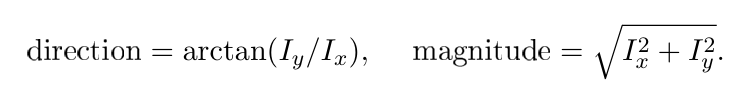

Edges can be detected by thresholding the gradient magnitude. This often results in thick
 contours that you will re ne in the next step.

In [ ]:
# Cube_Left
Cube_left_dx = sobel(Cube_left, axis=0)
Cube_left_dy = sobel(Cube_left, axis=1)

Direction_cube_left = np.arctan2(Cube_left_dy, Cube_left_dx)
Magnitude_cube_left = np.sqrt(Cube_left_dx**2 + Cube_left_dy**2)

# Cube_Right
Cube_right_dx = sobel(Cube_right, axis=0)
Cube_right_dy = sobel(Cube_right, axis=1)

Direction_cube_right = np.arctan2(Cube_right_dy, Cube_right_dx)
Magnitude_cube_right = np.sqrt(Cube_right_dx**2 + Cube_right_dy**2)

# Zurlim
Zurlim_dx = sobel(Zurlim, axis=0)
Zurlim_dy = sobel(Zurlim, axis=1)

Direction_zurlim =  np.arctan2(Zurlim_dy, Zurlim_dx)
Magnitude_zurlim = np.sqrt(Zurlim_x**2 + Zurlim_y**2)

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Cube_Left
axes[0, 0].imshow(Direction_cube_left, cmap='gray')
axes[0, 0].set_title('Direction - Cube Left')
axes[0, 1].imshow(Magnitude_cube_left, cmap='gray')
axes[0, 1].set_title('Magnitude - Cube Left')

# Cube_Right
axes[1, 0].imshow(Direction_cube_right, cmap='gray')
axes[1, 0].set_title('Direction - Cube Right')
axes[1, 1].imshow(Magnitude_cube_right, cmap='gray')
axes[1, 1].set_title('Magnitude - Cube Right')

# Zurlim
axes[2, 0].imshow(Direction_zurlim, cmap='gray')
axes[2, 0].set_title('Direction - Zurlim')
axes[2, 1].imshow(Magnitude_zurlim, cmap='gray')
axes[2, 1].set_title('Magnitude - Zurlim')

plt.tight_layout()
plt.show()

#### **Step 4:** Edge image obtained after the non-maximim suppression
Perform non-maximum suppression to identify candidate edges. A pixel in the contour is kept as edge pixel only if its **gradient magnitude is greater than that of its two neighboring pixels in the direction orthogonal to the edge**. Note that this step is not the same as the one used in the Harris corner detector

In [ ]:
# Step 4: Non-maximum suppression
def non_maximum_suppression(Magnitude, Direction):
    nms_output = np.zeros(Magnitude.shape)

    # Convert direction to degrees and normalize to [0, 180]
    angle = np.degrees(Direction)
    angle[angle < 0] += 180

    # Iterate through each pixel in the gradient magnitude (ignoring borders)
    for i in range(1, Magnitude.shape[0] - 1):
        for j in range(1, Magnitude.shape[1] - 1):
            # Determine neighboring pixels based on the gradient direction
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                neighbor1 = Magnitude[i, j + 1]  # Right
                neighbor2 = Magnitude[i, j - 1]  # Left
            elif 22.5 <= angle[i, j] < 67.5:
                neighbor1 = Magnitude[i + 1, j - 1]  # Bottom-left
                neighbor2 = Magnitude[i - 1, j + 1]  # Top-right
            elif 67.5 <= angle[i, j] < 112.5:
                neighbor1 = Magnitude[i + 1, j]  # Bottom
                neighbor2 = Magnitude[i - 1, j]  # Top
            else:  # 112.5 <= angle < 157.5
                neighbor1 = Magnitude[i - 1, j - 1]  # Top-left
                neighbor2 = Magnitude[i + 1, j + 1]  # Bottom-right

            # Suppress non-maximum pixels
            if Magnitude[i, j] >= neighbor1 and Magnitude[i, j] >= neighbor2:
                nms_output[i, j] = Magnitude[i, j]

    return nms_output

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Cube_Left

axes[0].imshow(non_maximum_suppression(Magnitude_cube_left, Direction_cube_left), cmap='gray')
axes[0].set_title('Non-maximum suppression - Cube Left')

# Cube_Right
axes[1].imshow(non_maximum_suppression(Magnitude_cube_right,Direction_cube_right), cmap='gray')
axes[1].set_title('Non-maximum suppression - Cube Right')

# Zurlim
axes[2].imshow(non_maximum_suppression(Magnitude_zurlim,Direction_zurlim), cmap='gray')
axes[2].set_title('Non-maximum suppression - Zurlim')

plt.tight_layout()
plt.show()